In [1]:
# Basic Packages
from __future__ import division
import os
from datetime import datetime

# Web & file access
import requests
import io

# Import display options for showing websites
from IPython.display import IFrame, HTML

In [2]:
# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

%pylab --no-import-all
%matplotlib inline

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_context("talk")

import plotly.express as px
import plotly.graph_objects as go

from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
# Next line can import all of plotnine, but may overwrite things? Better import each function/object you need
#from plotnine import *

Using matplotlib backend: <object object at 0x112820650>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
# Data
import pandas as pd
import numpy as np
from pandas_datareader import data, wb

# GIS & maps
import geopandas as gpd
gp = gpd
import georasters as gr
import geoplot as gplt
import geoplot.crs as gcrs
import mapclassify as mc
import textwrap

In [4]:
# Data Munging
from itertools import product, combinations
import difflib
import pycountry
import geocoder
from geonamescache.mappers import country
mapper = country(from_key='name', to_key='iso3')
mapper2 = country(from_key='iso3', to_key='iso')
mapper3 = country(from_key='iso3', to_key='name')

# Regressions & Stats
from scipy.stats import norm
import statsmodels.formula.api as smf
#from stargazer.stargazer import Stargazer, LineLocation

In [5]:
# Paths
pathout = './data/'

if not os.path.exists(pathout):
    os.mkdir(pathout)
    
pathgraphs = './graphs/'
if not os.path.exists(pathgraphs):
    os.mkdir(pathgraphs)

In [55]:
def my_xy_plot(dfin, 
               x='SP.POP.GROW', 
               y='ln_gdp_pc', 
               labelvar='iso3c', 
               dx=0.006125, 
               dy=0.006125, 
               xlogscale=False, 
               ylogscale=False,
               xlabel='Growth Rate of Population', 
               ylabel='Log[Income per capita in ' +  str(year) + ']',
               labels=False,
               xpct = False,
               ypct = False,
               OLS=False,
               OLSlinelabel='OLS',
               ssline=False,
               sslinelabel='45 Degree Line',
               filename='income-pop-growth.pdf',
               hue='region',
               hue_order=['East Asia & Pacific', 'Europe & Central Asia',
                          'Latin America & Caribbean ', 'Middle East & North Africa',
                          'North America', 'South Asia', 'Sub-Saharan Africa '],
               style='incomeLevel', 
               style_order=['High Income', 'Upper Middle Income', 'Lower Middle Income', 'Low Income'],
               palette=None,
               size=None,
               sizes=None,
               legend_fontsize=10,
               label_font_size=12,
               save=True):
    '''
    Plot the association between x and var in dataframe using labelvar for labels.
    '''
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.set_context("talk")
    df = dfin.copy()
    df = df.dropna(subset=[x, y]).reset_index(drop=True)
    # Plot
    k = 0
    fig, ax = plt.subplots()
    sns.scatterplot(x=x, y=y, data=df, ax=ax, 
                    hue=hue,
                    hue_order=hue_order,
                    #hue='incomeLevel',
                    #hue_order=['High Income', 'Upper Middle Income', 'Lower Middle Income', 'Low Income'],
                    #hue_order=['East Asia & Pacific', 'Europe & Central Asia',
                    #           'Latin America & Caribbean ', 'Middle East & North Africa',
                    #           'North America', 'South Asia', 'Sub-Saharan Africa '],
                    alpha=1, 
                    style=style, 
                    style_order=style_order,
                    palette=palette,
                    size=size,
                    sizes=sizes,
                    #palette=sns.color_palette("Blues_r", df[hue].unique().shape[0]+6)[:df[hue].unique().shape[0]*2:2],
                )
    if OLS:
        sns.regplot(x=x, y=y, data=df, ax=ax, label=OLSlinelabel, scatter=False)
    if ssline:
        ax.plot([df[x].min()*.99, df[x].max()*1.01], [df[x].min()*.99, df[x].max()*1.01], c='r', label=sslinelabel)
    if labels:
        movex = df[x].mean() * dx
        movey = df[y].mean() * dy
        for line in range(0,df.shape[0]):
            ax.text(df[x][line]+movex, df[y][line]+movey, df[labelvar][line], horizontalalignment='left', fontsize=label_font_size, color='black')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if xpct:
        fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
        xticks = mtick.FormatStrFormatter(fmt)
        ax.xaxis.set_major_formatter(xticks)
    if ypct:
        fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
        yticks = mtick.FormatStrFormatter(fmt)
        ax.yaxis.set_major_formatter(yticks)
    if ylogscale:
        ax.set(yscale="log")
    if xlogscale:
        ax.set(xscale="log")
    handles, labels = ax.get_legend_handles_labels()
    handles = np.array(handles)
    labels = np.array(labels)
    handles = list(handles[(labels!=hue) & (labels!=style) & (labels!=size)])
    labels = list(labels[(labels!=hue) & (labels!=style) & (labels!=size)])
    ax.legend(handles=handles, labels=labels, fontsize=legend_fontsize)
    if save:
        plt.savefig(pathgraphs + filename, dpi=300, bbox_inches='tight')
    return fig

In [6]:
currentYear = datetime.now().year
year = min(2020, currentYear-2)

<div class="alert alert-block alert-warning">
    <b>Exercise 1:</b> Get WDI data on <b>patent applications by residents and non-residents in each country</b>. Create a new variable that shows the total patents for each country.
</div>

In [67]:
url = 'https://data.worldbank.org/share/widget?indicators=IP.PAT.RESD'
IFrame(url, width=500, height=300)

In [66]:
url = 'https://data.worldbank.org/share/widget?indicators=IP.PAT.NRES'
IFrame(url, width=500, height=300)

In [157]:
url = 'http://databank.worldbank.org/data/reports.aspx?source=2&series=IP.PAT.RESD&country='

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

r = requests.get(url, headers=header)

Residents = pd.read_html(r.text)

In [158]:
Residents[19].columns = ['Country', 1990, 2000, 2012, 2013, 2014, 2015,
                         2016, 2017, 2018, 2019, 2020, 2021, 2022]
Residents[19].head()
residents = Residents[19].iloc[1: , :]
residents.head()

Country 1990  2000   2012   2013  2014  2015   2016   2017   2018  \
1     Afghanistan   ..    ..     ..     ..    ..    ..     ..     ..     ..   
2         Albania   ..    ..     ..     ..  10.0  14.0   20.0   16.0   15.0   
3         Algeria  6.0  32.0  119.0  118.0  94.0  89.0  106.0  149.0  152.0   
4  American Samoa   ..    ..     ..     ..    ..    ..     ..     ..     ..   
5         Andorra   ..    ..     ..     ..    ..    ..     ..     ..    1.0   

    2019   2020 2021  2022  
1     ..     ..   ..   NaN  
2    4.0     ..   ..   NaN  
3  113.0  163.0   ..   NaN  
4     ..     ..   ..   NaN  
5    3.0    3.0   ..   NaN

In [159]:
url = 'http://databank.worldbank.org/data/reports.aspx?source=2&series=IP.PAT.NRES&country='

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

r = requests.get(url, headers=header)

Nonresidents = pd.read_html(r.text)

In [160]:
Nonresidents[19].columns = ['Country', 1990, 2000, 2012, 2013, 2014, 2015,
                         2016, 2017, 2018, 2019, 2020, 2021, 2022]
Nonresidents[19].head()
nonresidents = Nonresidents[19].iloc[1: , :]
nonresidents.head()

Country   1990   2000   2012   2013   2014   2015   2016   2017  \
1     Afghanistan     ..     ..     ..     ..     ..     ..     ..     ..   
2         Albania     ..     ..     ..    4.0    3.0    5.0    5.0    8.0   
3         Algeria  229.0  127.0  781.0  722.0  719.0  716.0  566.0  594.0   
4  American Samoa     ..     ..     ..     ..     ..     ..     ..     ..   
5         Andorra     ..     ..     ..     ..     ..     ..    3.0    6.0   

    2018   2019   2020 2021  2022  
1     ..     ..     ..   ..   NaN  
2    3.0    1.0     ..   ..   NaN  
3  521.0  525.0  547.0   ..   NaN  
4     ..     ..     ..   ..   NaN  
5   10.0   12.0    5.0   ..   NaN

In [ ]:
# Part 1 done

In [161]:
url = 'https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#remote-data-wb'
# IFrame(url, width=800, height=400)

In [162]:
wbcountries = wb.get_countries()
wbcountries.head()

iso3c iso2c                         name                      region  \
0   ABW    AW                        Aruba  Latin America & Caribbean    
1   AFE    ZH  Africa Eastern and Southern                  Aggregates   
2   AFG    AF                  Afghanistan                  South Asia   
3   AFR    A9                       Africa                  Aggregates   
4   AFW    ZI   Africa Western and Central                  Aggregates   

  adminregion  incomeLevel     lendingType capitalCity  longitude  latitude  
0              High income  Not classified  Oranjestad   -70.0167   12.5167  
1               Aggregates      Aggregates                    NaN       NaN  
2  South Asia   Low income             IDA       Kabul    69.1761   34.5228  
3               Aggregates      Aggregates                    NaN       NaN  
4               Aggregates      Aggregates                    NaN       NaN

In [169]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita'
IFrame(url, width=800, height=400)

gdppc_wiki = pd.read_html(url, encoding='utf-8')[1]
gdppc_wiki

gdppc_wiki.columns = ['Country/Territory', 'UN Region', 'gdppc_IMF', 'year_IMF',
                      'gdppc_WB', 'year_WB', 'gdppc_CIA', 'year_CIA']
gdppc_wiki.head()

gdppc_wiki['Country/Territory'] = gdppc_wiki['Country/Territory'].str.replace('*', '', regex=True).str.strip()

for c in gdppc_wiki.columns[2:-1]:
    if gdppc_wiki[c].dtype=='O':
        gdppc_wiki[c] = pd.to_numeric(gdppc_wiki[c].str.replace('—', 'nan'), errors='coerce')
        if c.startswith('year'):
            gdppc_wiki[c] = gdppc_wiki[c].astype('Int64')
gdppc_wiki.columns = ['Country', 'UN Region', 'gdppc_IMF', 'year_IMF', 'gdppc_WB', 'year_WB', 
                      'gdppc_CIA', 'year_CIA']
gdppc_wiki.head()

Country UN Region  gdppc_IMF  year_IMF  gdppc_WB  year_WB  gdppc_CIA  \
0     Luxembourg    Europe   141587.0      2022  134754.0     2021     110300   
1  Liechtenstein    Europe        NaN      <NA>       NaN     <NA>     139100   
2      Singapore      Asia   131426.0      2022  116487.0     2021      93400   
3        Ireland    Europe   131034.0      2022  106456.0     2021      89700   
4         Monaco    Europe        NaN      <NA>       NaN     <NA>     115700   

  year_CIA  
0     2020  
1     2009  
2     2020  
3     2020  
4     2015

In [174]:
patents_merged = residents.merge(nonresidents, left_on='Country', right_on='Country')
patents_merged.head()

Country 1990_x 2000_x 2012_x 2013_x 2014_x 2015_x 2016_x 2017_x  \
0     Afghanistan     ..     ..     ..     ..     ..     ..     ..     ..   
1         Albania     ..     ..     ..     ..   10.0   14.0   20.0   16.0   
2         Algeria    6.0   32.0  119.0  118.0   94.0   89.0  106.0  149.0   
3  American Samoa     ..     ..     ..     ..     ..     ..     ..     ..   
4         Andorra     ..     ..     ..     ..     ..     ..     ..     ..   

  2018_x  ... 2013_y 2014_y 2015_y  2016_y 2017_y 2018_y 2019_y 2020_y 2021_y  \
0     ..  ...     ..     ..     ..      ..     ..     ..     ..     ..     ..   
1   15.0  ...    4.0    3.0    5.0     5.0    8.0    3.0    1.0     ..     ..   
2  152.0  ...  722.0  719.0  716.0   566.0  594.0  521.0  525.0  547.0     ..   
3     ..  ...     ..     ..     ..      ..     ..     ..     ..     ..     ..   
4    1.0  ...     ..     ..     ..     3.0    6.0   10.0   12.0    5.0     ..   

  2022_y  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN  

[5 rows x 27 columns]

In [211]:
full_merged = patents_merged.merge(wdi, left_on='Country', right_on='name')
full_merged.head()

Country 1990_x 2000_x 2012_x 2013_x 2014_x 2015_x 2016_x 2017_x 2018_x  \
0  Afghanistan     ..     ..     ..     ..     ..     ..     ..     ..     ..   
1  Afghanistan     ..     ..     ..     ..     ..     ..     ..     ..     ..   
2  Afghanistan     ..     ..     ..     ..     ..     ..     ..     ..     ..   
3  Afghanistan     ..     ..     ..     ..     ..     ..     ..     ..     ..   
4  Afghanistan     ..     ..     ..     ..     ..     ..     ..     ..     ..   

   ... NY.GDP.PCAP.PP.KD NY.GDP.PCAP.KD SL.GDP.PCAP.EM.KD  SP.POP.GROW  \
0  ...       1970.560169     529.741210       9226.547100     2.303812   
1  ...       2065.036235     555.138996       8522.606006     2.313073   
2  ...       2033.804389     546.743010       8490.085702     2.384309   
3  ...       2058.400221     553.355052       8698.017169     2.547833   
4  ...       2057.067978     552.996908       8795.234080     2.778035   

  SP.POP.TOTL SP.DYN.WFRT SP.DYN.TFRT.IN       gdp_pc ln_gdp_pc     ln_pop  
0  38928341.0         NaN          4.176  1970.560169  7.586073  17.477233  
1  38041757.0         NaN          4.321  2065.036235  7.632903  17.454195  
2  37171922.0         NaN          4.473  2033.804389  7.617663  17.431064  
3  36296111.0         NaN          4.633  2058.400221  7.629684  17.407221  
4  35383028.0         NaN          4.800  2057.067978  7.629037  17.381743  

[5 rows x 49 columns]

In [202]:
wbcountries = wb.get_countries()
wbcountries = wbcountries.loc[wbcountries.region.isin(['Aggregates'])==False].reset_index(drop=True)
wbcountries['name'] = wbcountries.name.str.strip()
wbcountries['incomeLevel'] = wbcountries['incomeLevel'].str.title()
wbcountries.loc[wbcountries.iso3c=='VEN', 'incomeLevel'] = 'Upper Middle Income'

In [203]:
wdi_indicators = ['NY.GDP.PCAP.PP.KD', 'NY.GDP.PCAP.KD', 'SL.GDP.PCAP.EM.KD', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.DYN.WFRT', 'SP.DYN.TFRT.IN']

In [204]:
popvars = wb.search(string='population')
popvars.head()

id  \
24     1.1_ACCESS.ELECTRICITY.TOT   
39   1.2_ACCESS.ELECTRICITY.RURAL   
40   1.3_ACCESS.ELECTRICITY.URBAN   
164            2.1_ACCESS.CFT.TOT   
195             3.11.01.01.popcen   

                                                  name unit  \
24       Access to electricity (% of total population)        
39       Access to electricity (% of rural population)        
40       Access to electricity (% of urban population)        
164  Access to Clean Fuels and Technologies for coo...        
195                                  Population census        

                              source  \
24        Sustainable Energy for All   
39        Sustainable Energy for All   
40        Sustainable Energy for All   
164       Sustainable Energy for All   
195  Statistical Capacity Indicators   

                                            sourceNote  \
24   Access to electricity is the percentage of pop...   
39   Access to electricity is the percentage of rur...   
40   Access to electricity is the percentage of tot...   
164                                                      
195  Population censuses collect data on the size, ...   

                                    sourceOrganization topics  
24   b'World Bank Global Electrification Database 2...         
39   b'World Bank Global Electrification Database 2...         
40   b'World Bank Global Electrification Database 2...         
164                                                b''         
195  b'World Bank Microdata library. Original sourc...

In [205]:
wdi = wb.download(indicator=wdi_indicators, country='all', start=1950, end=year)
wdi = wdi.reset_index()
wdi['year'] = wdi.year.astype(int)
wdi['gdp_pc'] = wdi['NY.GDP.PCAP.PP.KD']
wdi['ln_gdp_pc'] = wdi['NY.GDP.PCAP.PP.KD'].apply(np.log)
wdi['ln_pop'] = wdi['SP.POP.TOTL'].apply(np.log)
wdi.head()

country  year  NY.GDP.PCAP.PP.KD  NY.GDP.PCAP.KD  \
0  Africa Eastern and Southern  2020        3491.978104     1452.730251   
1  Africa Eastern and Southern  2019        3684.315172     1534.890147   
2  Africa Eastern and Southern  2018        3697.317275     1544.077975   
3  Africa Eastern and Southern  2017        3694.912741     1546.795571   
4  Africa Eastern and Southern  2016        3691.284532     1548.813076   

   SL.GDP.PCAP.EM.KD  SP.POP.GROW  SP.POP.TOTL  SP.DYN.WFRT  SP.DYN.TFRT.IN  \
0        9261.307330     2.605427  677243299.0          NaN        4.281856   
1        9486.431025     2.636666  660046272.0     3.884984        4.349436   
2        9546.202255     2.665620  643090131.0          NaN        4.420264   
3        9575.237978     2.690902  626392880.0          NaN        4.493744   
4        9602.411014     2.712218  609978946.0          NaN        4.569675   

        gdp_pc  ln_gdp_pc     ln_pop  
0  3491.978104   8.158224  20.333541  
1  3684.315172   8.211840  20.307820  
2  3697.317275   8.215363  20.281795  
3  3694.912741   8.214712  20.255488  
4  3691.284532   8.213730  20.228935

In [206]:
wdi = wbcountries.merge(wdi, left_on='name', right_on='country')
wdi.head()

iso3c iso2c   name                      region adminregion  incomeLevel  \
0   ABW    AW  Aruba  Latin America & Caribbean               High Income   
1   ABW    AW  Aruba  Latin America & Caribbean               High Income   
2   ABW    AW  Aruba  Latin America & Caribbean               High Income   
3   ABW    AW  Aruba  Latin America & Caribbean               High Income   
4   ABW    AW  Aruba  Latin America & Caribbean               High Income   

      lendingType capitalCity  longitude  latitude  ... NY.GDP.PCAP.PP.KD  \
0  Not classified  Oranjestad   -70.0167   12.5167  ...      29563.756955   
1  Not classified  Oranjestad   -70.0167   12.5167  ...      38221.117314   
2  Not classified  Oranjestad   -70.0167   12.5167  ...      39206.356147   
3  Not classified  Oranjestad   -70.0167   12.5167  ...      38893.960556   
4  Not classified  Oranjestad   -70.0167   12.5167  ...      37046.877414   

   NY.GDP.PCAP.KD  SL.GDP.PCAP.EM.KD  SP.POP.GROW  SP.POP.TOTL  SP.DYN.WFRT  \
0    23026.332866                NaN     0.428017     106766.0          NaN   
1    29769.293907                NaN     0.437415     106310.0          NaN   
2    30536.667193                NaN     0.459266     105846.0          NaN   
3    30293.351539                NaN     0.471874     105361.0          NaN   
4    28854.713299                NaN     0.502860     104865.0          NaN   

   SP.DYN.TFRT.IN        gdp_pc  ln_gdp_pc     ln_pop  
0           1.901  29563.756955  10.294304  11.578395  
1           1.901  38221.117314  10.551143  11.574115  
2           1.896  39206.356147  10.576594  11.569740  
3           1.886  38893.960556  10.568594  11.565148  
4           1.872  37046.877414  10.519939  11.560429  

[5 rows x 22 columns]

<div class="alert alert-block alert-warning">
<b>Exercise 2:</b> Using the <code>my_xy_plot</code> function plot the relation between <b>GDP per capita</b> and <b>total patents</b> in the years 1990, 1995, 2000, 2010, 2020.
</div>

TypeError: can't multiply sequence by non-int of type 'float'

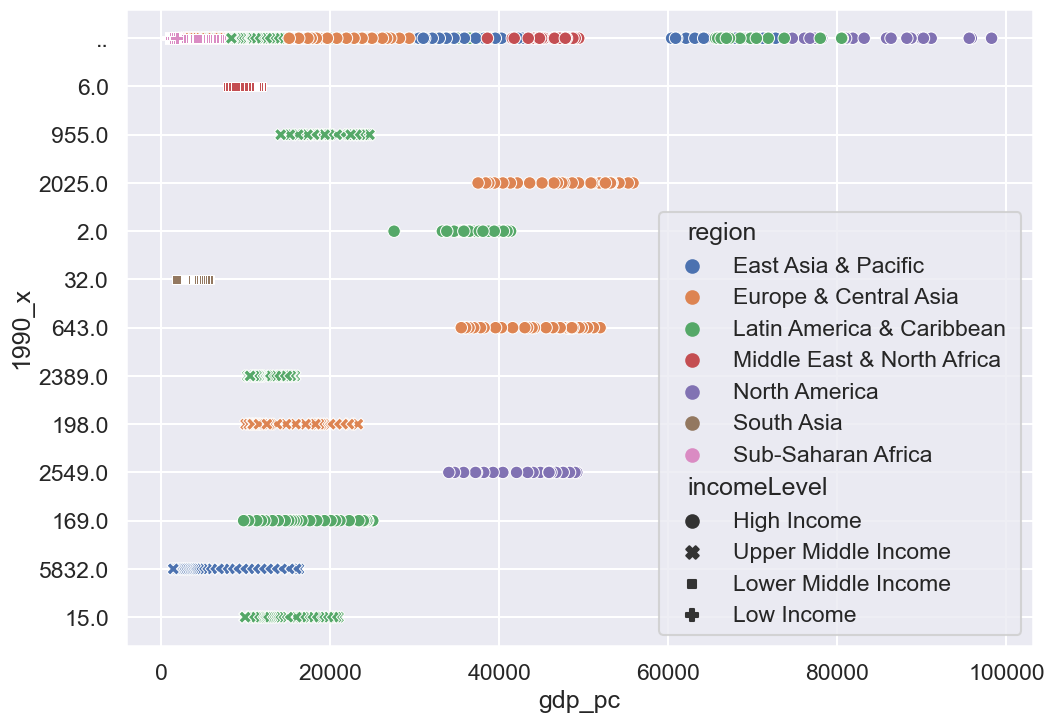

In [214]:
g = my_xy_plot(full_merged, 
               x='gdp_pc', 
               y='1990_x', 
               xlabel='GDP per capita',
               ylabel='Total Patents',
               OLS=True,
               labels=True, 
               #size="ln_pop", 
               #sizes=(10, 400), 
               filename='ln-gdp-pc-latitude.pdf')

TypeError: can't multiply sequence by non-int of type 'float'

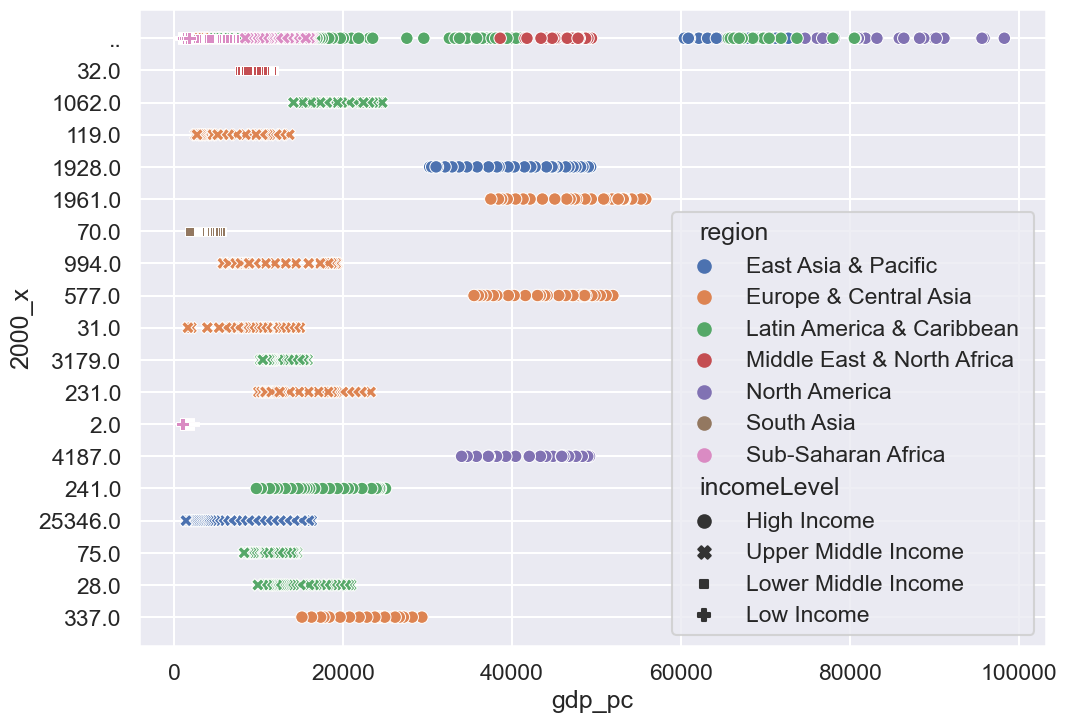

In [216]:
g = my_xy_plot(full_merged, 
               x='gdp_pc', 
               y='2000_x', 
               xlabel='GDP per capita',
               ylabel='Total Patents',
               OLS=True,
               labels=True, 
               #size="ln_pop", 
               #sizes=(10, 400), 
               filename='ln-gdp-pc-latitude.pdf')

TypeError: can't multiply sequence by non-int of type 'float'

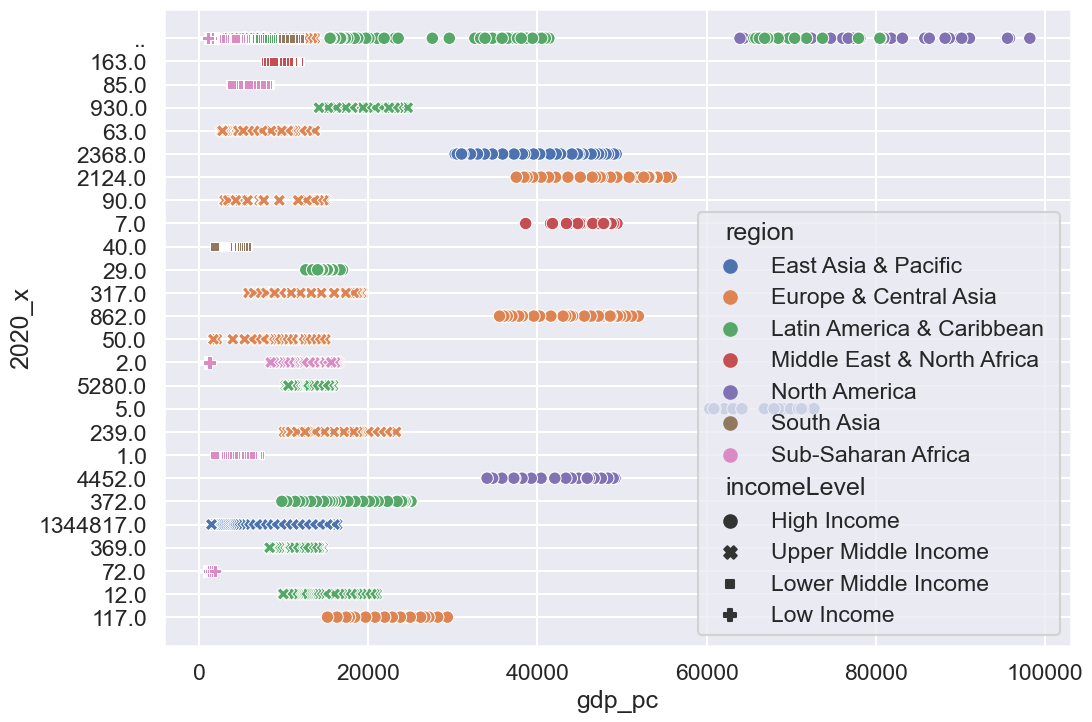

In [218]:
g = my_xy_plot(full_merged, 
               x='gdp_pc', 
               y='2020_x', 
               xlabel='GDP per capita',
               ylabel='Total Patents',
               OLS=True,
               labels=True, 
               #size="ln_pop", 
               #sizes=(10, 400), 
               filename='ln-gdp-pc-latitude.pdf')

<div class="alert alert-block alert-warning">
<b>Exercise 3:</b> Using the <code>my_xy_line_plot</code> function plot the evolution of <b>GDP per capita</b> and <b>total patents</b> by income groups and regions (separate figures).
</div>

In [221]:
def my_xy_line_plot(dfin, 
                    x='year', 
                    y='ln_gdp_pc', 
                    labelvar='iso3c', 
                    dx=0.006125, 
                    dy=0.006125, 
                    xlogscale=False, 
                    ylogscale=False,
                    xlabel='Growth Rate of Population', 
                    ylabel='Log[Income per capita in ' +  str(year) + ']',
                    labels=False,
                    xpct = False,
                    ypct = False,
                    OLS=False,
                    OLSlinelabel='OLS',
                    ssline=False,
                    sslinelabel='45 Degree Line',
                    filename='income-pop-growth.pdf',
                    hue='region',
                    hue_order=['East Asia & Pacific', 'Europe & Central Asia',
                               'Latin America & Caribbean ', 'Middle East & North Africa',
                               'North America', 'South Asia', 'Sub-Saharan Africa '],
                    style='incomeLevel', 
                    style_order=['High Income', 'Upper Middle Income', 'Lower Middle Income', 'Low Income'],
                    palette=None,
                    legend_fontsize=10,
                    label_fontsize=12,
                    loc=None,
                    save=True):
    '''
    Plot the association between x and var in dataframe using labelvar for labels. 
    '''
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.set_context("talk")
    df = dfin.copy()
    df = df.dropna(subset=[x, y]).reset_index(drop=True)
    # Plot
    k = 0
    fig, ax = plt.subplots()
    sns.lineplot(x=x, y=y, data=df, ax=ax, 
                    hue=hue,
                    hue_order=hue_order,
                    alpha=1, 
                    style=style, 
                    style_order=style_order,
                    palette=palette,
                )
    if OLS:
        sns.regplot(x=x, y=y, data=df, ax=ax, label=OLSlinelabel, scatter=False)
    if ssline:
        ax.plot([df[x].min()*.99, df[x].max()*1.01], [df[x].min()*.99, df[x].max()*1.01], c='r', label=sslinelabel)
    if labels:
        movex = df[x].mean() * dx
        movey = df[y].mean() * dy
        for line in range(0,df.shape[0]):
            ax.text(df[x][line]+movex, df[y][line]+movey, df[labelvar][line], horizontalalignment='left', fontsize=label_fontsize, color='black')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if xpct:
        fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
        xticks = mtick.FormatStrFormatter(fmt)
        ax.xaxis.set_major_formatter(xticks)
    if ypct:
        fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
        yticks = mtick.FormatStrFormatter(fmt)
        ax.yaxis.set_major_formatter(yticks)
    if ylogscale:
        ax.set(yscale="log")
    if xlogscale:
        ax.set(xscale="log")
    handles, labels = ax.get_legend_handles_labels()
    handles = np.array(handles)
    labels = np.array(labels)
    handles = list(handles[(labels!='region') & (labels!='incomeLevel')])
    labels = list(labels[(labels!='region') & (labels!='incomeLevel')])
    ax.legend(handles=handles, labels=labels, fontsize=legend_fontsize, loc=loc)
    if save:
        plt.savefig(pathgraphs + filename, dpi=300, bbox_inches='tight')
    return fig

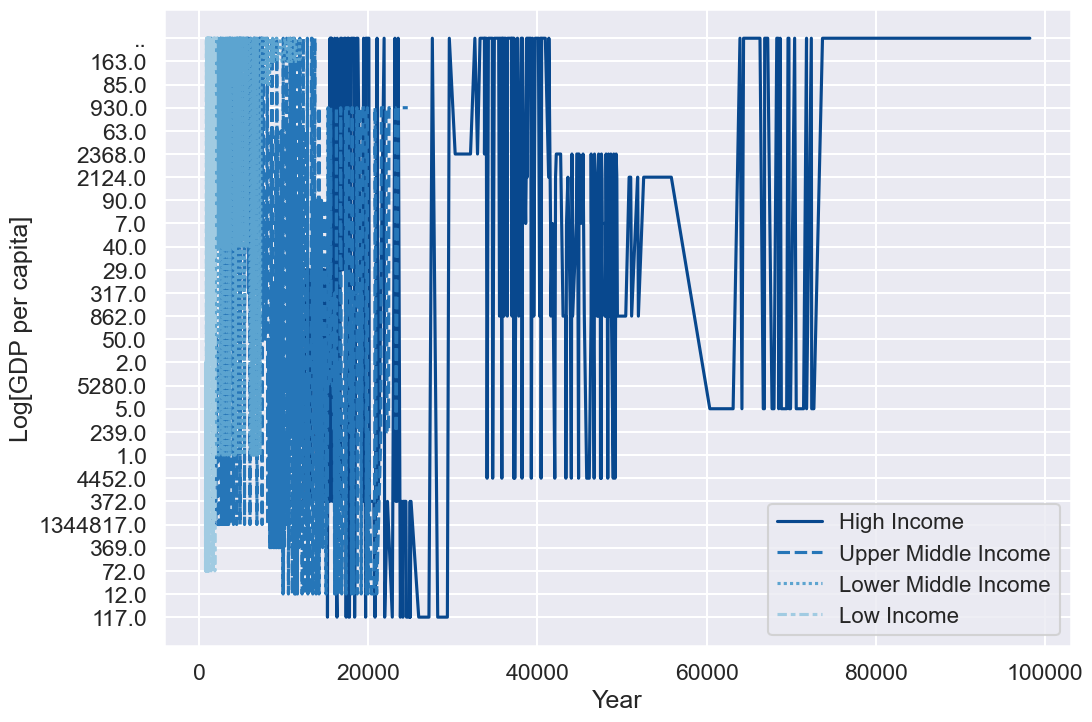

In [222]:
palette=sns.color_palette("Blues_r", wdi['incomeLevel'].unique().shape[0]+6)[:wdi['incomeLevel'].unique().shape[0]*2:2]
fig = my_xy_line_plot(full_merged, 
                x='gdp_pc', 
                y='2020_x', 
                xlabel='Year',
                ylabel='Log[GDP per capita]',
                filename='ln-gdp-pc-income-groups-TS.pdf',
                hue='incomeLevel',
                hue_order=['High Income', 'Upper Middle Income', 'Lower Middle Income', 'Low Income'],
                palette=palette,
                OLS=False, 
                labels=False,
                legend_fontsize=16,
                loc='lower right',
                save=True)

<div class="alert alert-block alert-warning">
<b>Exercise 4:</b> Plot the relation between patenting activity by <b>residents and non-residents</b> in the year 2015. Make sure to show the 45 degree line so you can see how similar they are.
</div>

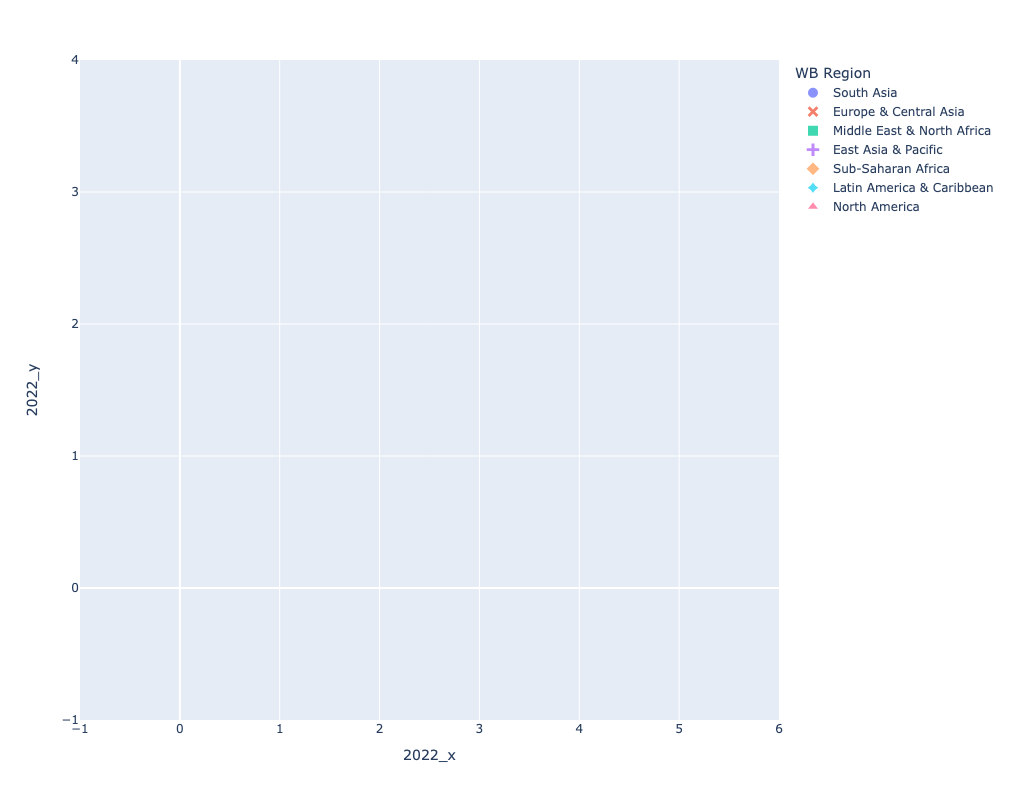

In [231]:
symbols = ['circle', 'x', 'square', 'cross', 'diamond', 'star-diamond', 'triangle-up']
fig = px.scatter(full_merged,
                 x="2022_x", 
                 y="2022_y", 
                 color='region',
                 symbol='region',
                 symbol_sequence=symbols,
                 hover_name='Country',
                 size='ln_pop',
                 size_max=15,
                 trendline="ols",
                 trendline_scope="overall",
                 trendline_color_override="black",
                 labels={
                     "latitude": "Latitude",
                     "ln_gdp_pc": "Log[GDP per capita (" + str(year) + ")]",
                     "gdp_pc": "GDP per capita (" + str(year) + ")",
                     "region": "WB Region"
                 },
                 opacity=0.75,
                 height=800,
                )
fig

<div class="alert alert-block alert-warning">
<b>Exercise 5:</b> Create a static and a dynamic map for patenting activity in the year 2015 across the world. 
</div>

ValueError: The input GeoDataFrame does not have a "geometry" column set.

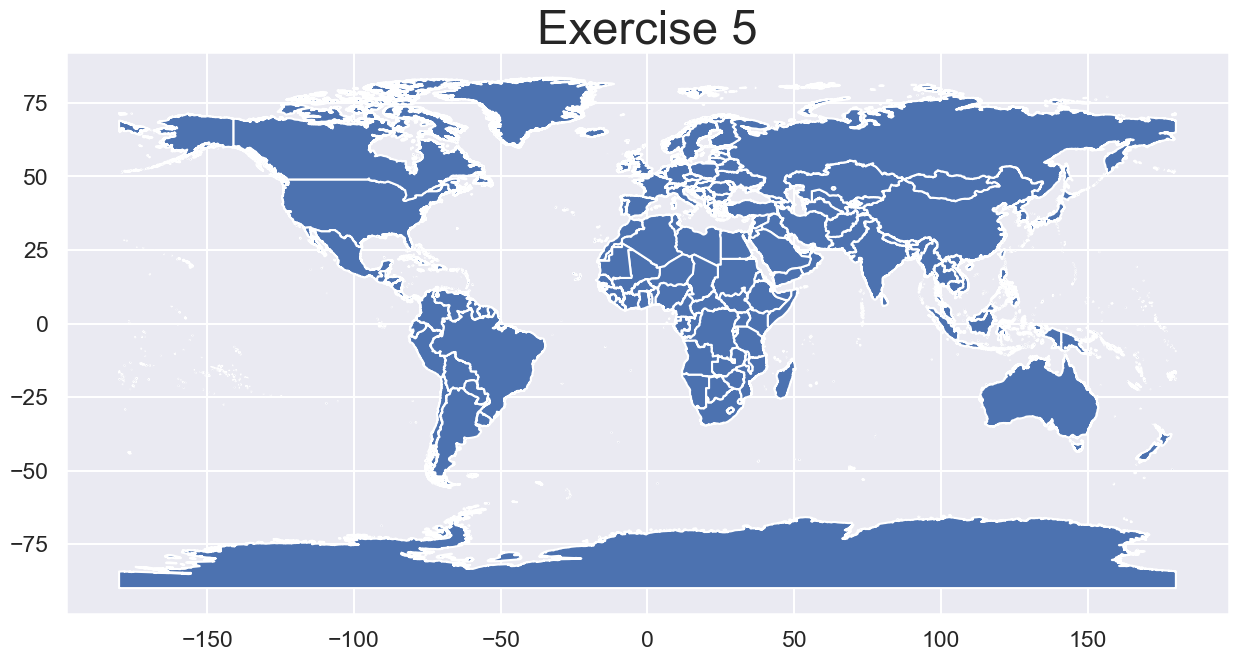

In [238]:
# Static
headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.103 Safari/537.36', 'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8'}

url = 'https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_0_countries.zip'
r = requests.get(url, headers=headers)
countries = gp.read_file(io.BytesIO(r.content))
fig, ax = plt.subplots(figsize=(15,10))
countries.plot(ax=ax)
ax.set_title("Exercise 5", fontdict={'fontsize':34})
gplt.polyplot(
    full_merged, projection=gcrs.PlateCarree(central_longitude=0.0, globe=None),
    edgecolor='white', facecolor='lightgray',
    rasterized=True,
    extent=[-180, -90, 180, 90],
)
gplt.choropleth(full_merged, hue='2015_x', 
                projection=gcrs.PlateCarree(central_longitude=0.0, globe=None),
                edgecolor='white', 
                linewidth=1,
                cmap='Reds', legend=True,
                scheme='FisherJenks',
                legend_kwargs={'bbox_to_anchor':(0.3, 0.5),
                               'frameon': True,
                               'title':'GDP per capita',
                              },
                figsize=(12,8),
                rasterized=True,
               )

In [243]:
# Dynamic
scheme = mc.Quantiles(full_merged['2015_x'], k=5)
classifier = mc.Quantiles.make(k=5, rolling=True)
full_merged['2015_x'] = classifier(full_merged['2015_x'])
full_merged['2015_x'] = full_merged['2015_x'].apply(lambda x: scheme.get_legend_classes()[x].replace('[   ', '[').replace('( ', '('))
fig = px.choropleth(dffig2.sort_values('gdp_pc_q', ascending=True), 
                    locations="iso3c",
                    color="gdp_pc_qc",
                    hover_name='name',
                    hover_data=['iso3c', 'ln_pop'],
                    labels={
                        "gdp_pc_qc": "GDP per capita (" + str(year) + ")",
                    },
                    color_discrete_sequence=px.colors.sequential.Reds,
                    height=600, 
                    width=1000,
                   )
# Change legend position
fig.update_layout(legend=dict(
    yanchor="bottom",
    y=0.15,
    xanchor="left",
    x=0.05
))

TypeError: can't multiply sequence by non-int of type 'float'

<div class="alert alert-block alert-warning">
<b>Exercise 6:</b> Explore the relation between economic development as measured by Log[GDP per capita] and patenting activity. Show the relation for residents, non-residents, and total, all in one nice looking table. Also, produce a few nice looking figures.
</div>

In [244]:
full_merged

Country 1990_x 2000_x 2012_x 2013_x 2014_x 2015_x 2016_x 2017_x  \
0     Afghanistan     ..     ..     ..     ..     ..     ..     ..     ..   
1     Afghanistan     ..     ..     ..     ..     ..     ..     ..     ..   
2     Afghanistan     ..     ..     ..     ..     ..     ..     ..     ..   
3     Afghanistan     ..     ..     ..     ..     ..     ..     ..     ..   
4     Afghanistan     ..     ..     ..     ..     ..     ..     ..     ..   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
3045         Cuba     ..     ..   38.0   27.0   24.0     ..   32.0   29.0   
3046         Cuba     ..     ..   38.0   27.0   24.0     ..   32.0   29.0   
3047         Cuba     ..     ..   38.0   27.0   24.0     ..   32.0   29.0   
3048         Cuba     ..     ..   38.0   27.0   24.0     ..   32.0   29.0   
3049         Cuba     ..     ..   38.0   27.0   24.0     ..   32.0   29.0   

     2018_x  ... NY.GDP.PCAP.PP.KD NY.GDP.PCAP.KD SL.GDP.PCAP.EM.KD  \
0        ..  ...       1970.560169     529.741210       9226.547100   
1        ..  ...       2065.036235     555.138996       8522.606006   
2        ..  ...       2033.804389     546.743010       8490.085702   
3        ..  ...       2058.400221     553.355052       8698.017169   
4        ..  ...       2057.067978     552.996908       8795.234080   
...     ...  ...               ...            ...               ...   
3045   29.0  ...               NaN            NaN               NaN   
3046   29.0  ...               NaN            NaN               NaN   
3047   29.0  ...               NaN            NaN               NaN   
3048   29.0  ...               NaN            NaN               NaN   
3049   29.0  ...               NaN            NaN               NaN   

      SP.POP.GROW SP.POP.TOTL SP.DYN.WFRT SP.DYN.TFRT.IN       gdp_pc  \
0        2.303812  38928341.0         NaN          4.176  1970.560169   
1        2.313073  38041757.0         NaN          4.321  2065.036235   
2        2.384309  37171922.0         NaN          4.473  2033.804389   
3        2.547833  36296111.0         NaN          4.633  2058.400221   
4        2.778035  35383028.0         NaN          4.800  2057.067978   
...           ...         ...         ...            ...          ...   
3045     2.204965   7793258.0         NaN          4.600          NaN   
3046     2.252093   7623300.0         NaN          4.584          NaN   
3047     2.202014   7453535.0         NaN          4.502          NaN   
3048     2.078171   7291201.0         NaN          4.365          NaN   
3049          NaN   7141241.0         NaN          4.192          NaN   

     ln_gdp_pc     ln_pop  
0     7.586073  17.477233  
1     7.632903  17.454195  
2     7.617663  17.431064  
3     7.629684  17.407221  
4     7.629037  17.381743  
...        ...        ...  
3045       NaN  15.868770  
3046       NaN  15.846720  
3047       NaN  15.824199  
3048       NaN  15.802179  
3049       NaN  15.781397  

[3050 rows x 49 columns]